In [1]:
from bio_lib_py.bio_lib import *
import bio_lib_string_rs
import perfplot
import numpy as np

def rand_bases(n, type="DNA"):
    if type == "DNA":
        BASES = ["A", "C", "T", "G"]
    if type == "RNA":
        BASES = ["A", "C", "U", "G"]
    nums = np.random.uniform(low=0, high=3, size=n)
    return ''.join([BASES[round(i)] for i in nums ])


Overall ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--

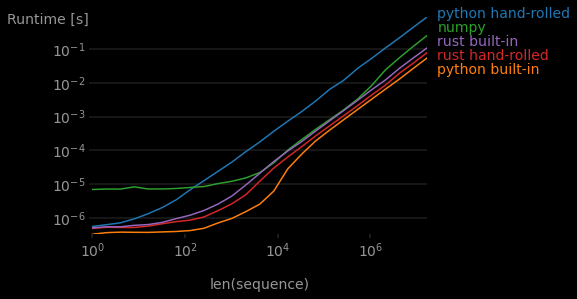

In [2]:

perfplot.show(
    setup=lambda n: rand_bases(n),  # or setup=np.random.rand
    kernels=[
        lambda a: transcribe(a), 
        lambda a: transcribe_builtin(a),
        lambda a: transcribe_np(a),
        lambda a: bio_lib_string_rs.transcribe(a),
        lambda a: bio_lib_string_rs.transcribe_builtin(a)
    ],
    labels=["python hand-rolled", "python built-in", "numpy", 
            "rust hand-rolled", "rust built-in"],
    n_range=[2 ** k for k in range(25)],
    xlabel="len(sequence)",
    # More optional arguments with their default values:
    # logx="auto",  # set to True or False to force scaling
    # logy="auto",
    equality_check=None,  # set to None to disable "correctness" assertion
    # target_time_per_measurement=1.0,
    # max_time=None,  # maximum time per measurement
    # time_unit="s",  # set to one of ("auto", "s", "ms", "us", or "ns") to force plot units
    # relative_to=1,  # plot the timings relative to one of the measurements
    # flops=lambda n: 3*n,  # FLOPS plots
)

Output()

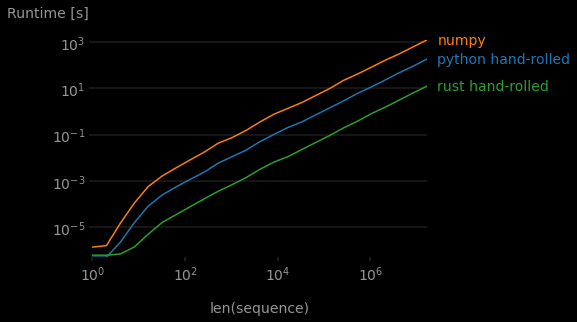

In [ ]:
perfplot.show(
    setup=lambda n: rand_bases(n),  
    kernels=[
        lambda a: find_reverse_palindromes(a),
        lambda a: find_reverse_palindromes_np(a),
        lambda a: find_reverse_palindromes_rs(a),
    ],
    labels=["python hand-rolled", "numpy", 
            "rust hand-rolled"],
    n_range=[2 ** k for k in range(25)],
    xlabel="len(sequence)",
    equality_check=None,  # set to None to disable "correctness" assertion
)

Overall ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Kernels ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% 0:00:01

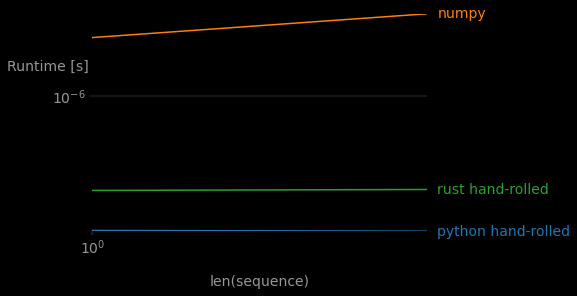

In [2]:
perfplot.show(
    setup=lambda n: rand_bases(n),  
    kernels=[
        lambda a: find_reverse_palindromes(a),
        lambda a: find_reverse_palindromes_np(a),
        lambda a: find_reverse_palindromes_string_rs(a),
    ],
    labels=["python hand-rolled", "numpy", 
            "rust hand-rolled"],
    n_range=[2 ** k for k in range(2)],
    xlabel="len(sequence)",
    equality_check=None,  # set to None to disable "correctness" assertion
)

In [5]:
from Bio.Seq import Seq
s = Seq(rand_bases(3)).translate()
s.reverse_complement()


Seq('Y')

Overall ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Kernels ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--

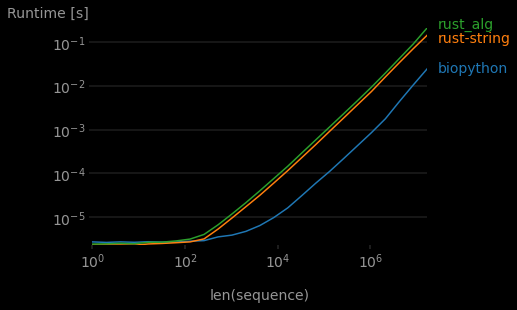

In [2]:

perfplot.show(
    setup=lambda n: Seq(rand_bases(n)),  
    kernels=[
        lambda a: a.reverse_complement(),
        lambda a: reverse_complement_dna_string_rs(a),
        lambda a: reverse_complement_dna_alg_rs(a),
    ],
    labels=["biopython", "rust-string", "rust_alg"],
    n_range=[2 ** k for k in range(25)],
    xlabel="len(sequence)",
    # More optional arguments with their default values:
    # logx="auto",  # set to True or False to force scaling
    # logy="auto",
    equality_check=None,  # set to None to disable "correctness" assertion
    # target_time_per_measurement=1.0,
    # max_time=None,  # maximum time per measurement
    # time_unit="s",  # set to one of ("auto", "s", "ms", "us", or "ns") to force plot units
    # relative_to=1,  # plot the timings relative to one of the measurements
    # flops=lambda n: 3*n,  # FLOPS plots
)

Overall ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━  96% -:--:--
Kernels ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━  60% 0:00:23

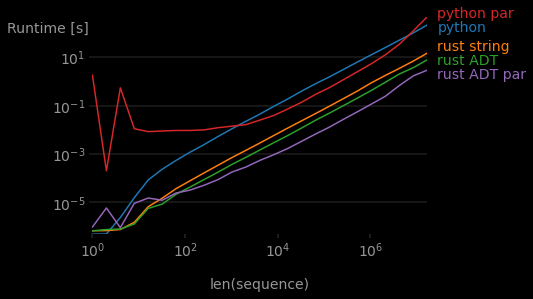

In [2]:
perfplot.show(
    setup=lambda n: rand_bases(n),  
    kernels=[
        lambda a: find_reverse_palindromes(a),
        lambda a: find_reverse_palindromes_string_rs(a),
        lambda a: find_reverse_palindromes_alg_rs(a),
        lambda a: find_reverse_palindromes_par(a),
        lambda a: find_reverse_palindromes_alg_rs_par(a),
    ],
    labels=["python", "rust string", "rust ADT", "python par", "rust ADT par"],
    n_range=[2 ** k for k in range(25)],
    xlabel="len(sequence)",
    equality_check=None,  # set to None to disable "correctness" assertion
)